# Vital Lands vs Sonoma Veg Map data

This notebook compares the agricultural land in the Vital Lands dataset with the Sonoma Veg Map agricultural lands. This is information will be used to inform which dataset to use in the Sonoma County Resilience Project.

In [1]:
# Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Administrative boundaries
soco_bound = gpd.read_file("../data/clean/sonoma_county_boundary/sonoma_county_boundary.shp")

# Vital Lands data
vli_ag = gpd.read_file("../data/clean/vulnerability_shps/agriculture/agriculture.shp") 

# Sonoma Veg Map data
sonoma_veg = gpd.read_file("../data/raw/Sonoma_County_Veg_Map_Shp/Sonoma_Veg_Map_5_1.shp")

In [3]:
sonoma_veg.sample(10)

,OBJECTID,MAP_CLASS,SOURCE,REL_COV,ALLIANCE,OID_COPY,Abbrv,LIFEFORM,LF_FOREST,SERP_FLAG,...,SD_QAV,MN_SKE,SD_SKE,MN_AVG,MN_KUR,SD_KUR,MN_STD,Shape_Leng,Shape_Area,geometry
86125,86126,Arbutus menziesii Alliance,Remotely Sensed,10-30%S/70-90%H,None,86126,ARME,Native Forest,Hardwood Forest,0,...,597.415,-0.042038,0.588480,33.7830,3.21232,1.094470,9.62989,1142.781891,45055.054769,"POLYGON ((6253559.568 1939910.785, 6253560.000..."
202093,202094,California Annual and Perennial Grassland Macr...,Remotely Sensed,N/A,None,202094,CA Grass,Herbaceous,Herbaceous,0,...,-9999.000,-9999.000000,-9999.000000,-9999.0000,-9999.00000,-9999.000000,-9999.00000,1684.314752,57420.887354,"POLYGON ((6304758.000 2058993.000, 6304758.000..."
79796,79797,Umbellularia californica Alliance,Remotely Sensed,10-30%S/70-90%H,None,79797,UMCA,Native Forest,Hardwood Forest,0,...,1168.020,-0.141661,0.706347,33.1032,2.99214,1.420880,11.41040,1711.430529,115638.729718,"POLYGON ((6227367.000 1952830.000, 6227380.000..."
50380,50381,Forest Sliver,Remotely Sensed,N/A,None,50381,For Sliv,Forest Sliver,Forest Sliver,0,...,-9999.000,-9999.000000,-9999.000000,-9999.0000,-9999.00000,-9999.000000,-9999.00000,558.948215,21876.927745,"POLYGON ((6393961.999 1882067.999, 6393947.997..."
1656,1657,Pseudotsuga menziesii Alliance,Remotely Sensed,70-90%S/10-30%H,None,1657,PSME,Native Forest,Conifer Forest,0,...,589.405,-0.042602,0.782011,22.5573,3.07117,1.611110,7.04706,1491.860215,77715.769086,"POLYGON ((6243147.878 1922964.000, 6243148.122..."
195525,195526,Pinus attenuata Alliance,Remotely Sensed,70-90%S/10-30%H,None,195526,PIAT,Native Forest,Conifer Forest,0,...,153.356,0.754994,0.678474,14.2249,3.47943,2.070170,4.97732,2420.877278,167118.753483,"POLYGON ((6341709.000 2043255.000, 6341712.000..."
140079,140080,Vineyard,Remotely Sensed,N/A,None,140080,Vineyard,Vineyard,Agriculture,0,...,-9999.000,-9999.000000,-9999.000000,-9999.0000,-9999.00000,-9999.000000,-9999.00000,1798.285178,114367.537219,"POLYGON ((6278382.000 2045271.514, 6278386.030..."
128987,128988,Forest Sliver,Remotely Sensed,N/A,None,128988,For Sliv,Forest Sliver,Forest Sliver,0,...,-9999.000,-9999.000000,-9999.000000,-9999.0000,-9999.00000,-9999.000000,-9999.00000,794.085263,28830.001807,"POLYGON ((6236850.000 2044608.000, 6236850.000..."
154318,154319,"Quercus (agrifolia, douglasii, garryana, kello...",Remotely Sensed,0-10%S/90-100%H,None,154319,QU Spp.,Native Forest,Hardwood Forest,0,...,567.761,-0.493291,0.530627,32.5928,2.78245,0.967394,10.09440,9049.151084,652951.491402,"POLYGON ((6309792.000 1965790.000, 6309786.000..."
87748,87749,Developed,Remotely Sensed,N/A,None,87749,Dev,Developed,Developed,0,...,-9999.000,-9999.000000,-9999.000000,-9999.0000,-9999.00000,-9999.000000,-9999.00000,2182.004447,86121.019810,"POLYGON ((6280797.000 1961364.000, 6280780.000..."


In [3]:
# Natural lands lifeform classifications
sonoma_veg.LF_FOREST.unique()

array(['Conifer Forest', 'Mixed Conifer-Hardwood Forest',
       'Hardwood Forest', 'Shrub', 'Herbaceous', 'Agriculture',
       'Barrren and Sparsely Vegetated', 'Herbaceous Wetland',
       'Developed', 'Non-native Forest', 'Forest Sliver',
       'Non-native Shrub', 'Salt Marsh', 'Riparian Forest',
       'Riparian Shrub', 'Water', 'Aquatic Vegetation'], dtype=object)

In [10]:
# Agriculture lifeform classifications
sonoma_veg.LIFEFORM.unique()

array(['Native Forest', 'Shrub', 'Herbaceous', 'Annual Cropland',
       'Barren & Sparsely Vegetated', 'Developed',
       'Non-native Forest & Woodland', 'Forest Sliver',
       'Intensively Managed Hayfield', 'Irrigated Pasture',
       'Non-native Shrub', 'Orchard or Grove', 'Perennial Agriculture',
       'Vineyard', 'Water', 'Major Roads',
       'Nursery or Ornamental Horticultural Area', 'Vineyard Replant',
       'Urban Window'], dtype=object)

<AxesSubplot:>

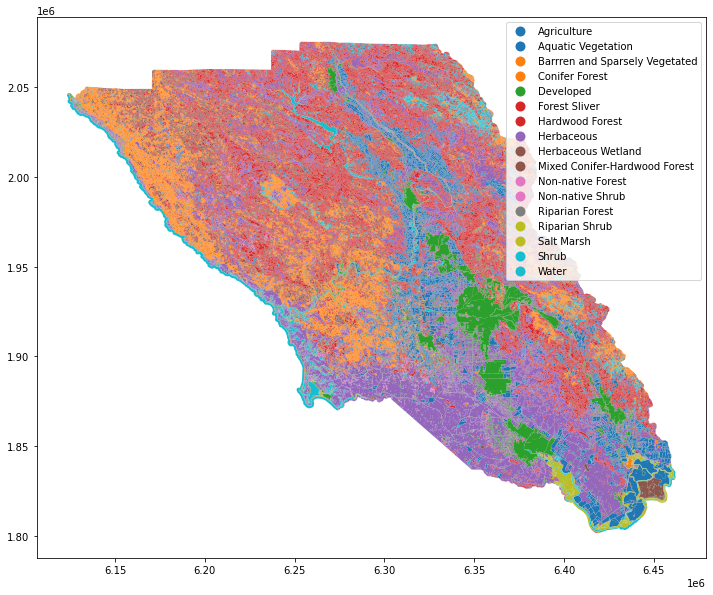

In [8]:
# Forest life form map
sonoma_veg.plot(column="LF_FOREST", figsize = (12,15), legend=True)

<AxesSubplot:>

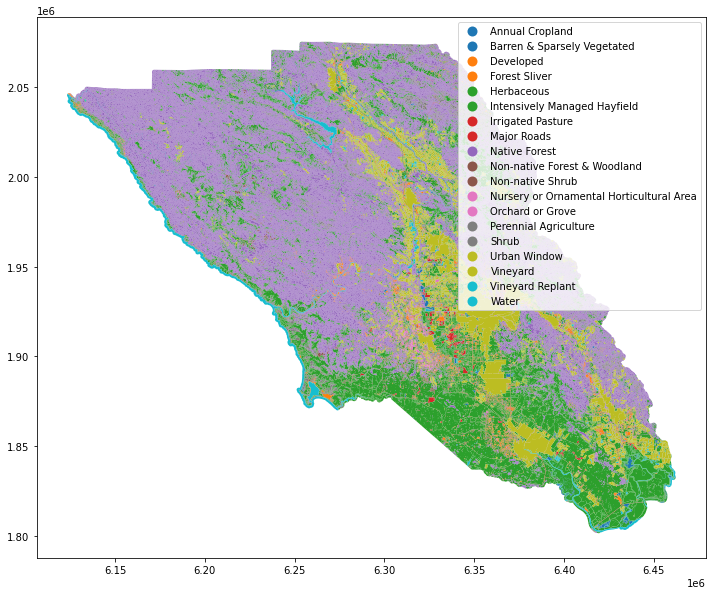

In [3]:
# agriculture life form map
sonoma_veg.plot(column="LIFEFORM", figsize = (12,10), legend=True)

In [20]:
# Just agricultural areas in the Sonoma Veg dataset
sonoma_veg_ag = sonoma_veg[~sonoma_veg.LIFEFORM.isin(['Native Forest', 'Shrub','Barren & Sparsely Vegetated', 'Developed',
                                                     'Non-native Forest & Woodland', 'Forest Sliver','Non-native Shrub', 'Water', 'Major Roads', 'Urban Window'])]

In [6]:
# transform projection of sonoma county to match sonoma county data
soco_crs = soco_bound.to_crs(epsg=2226)

<AxesSubplot:>

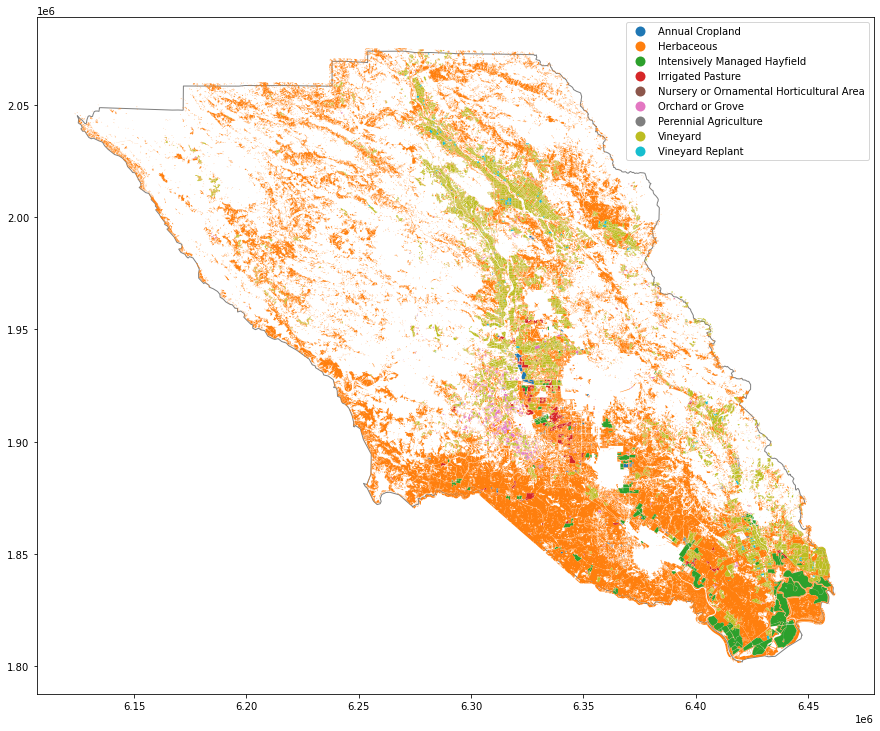

In [21]:
# Sonoma Veg agricultural land
fig, ax = plt.subplots(figsize=(15,15))
soco_crs.plot(ax=ax, edgecolor = "grey", color = "white")
sonoma_veg_ag.plot(ax=ax, column="LIFEFORM", figsize = (12,10), legend=True)

<AxesSubplot:>

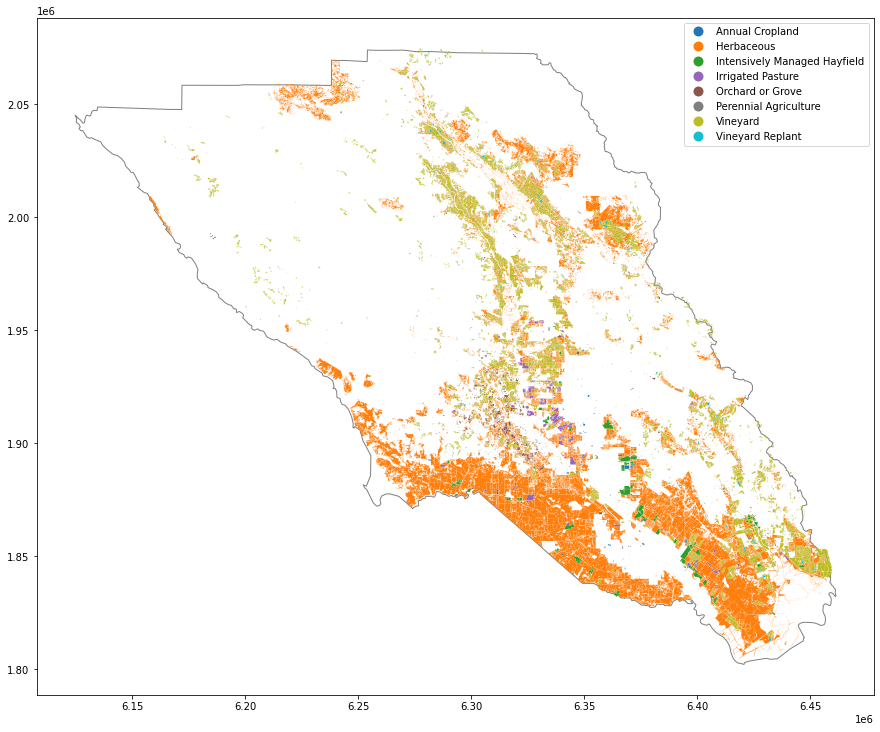

In [7]:
# vital lands agricultural land
fig, ax = plt.subplots(figsize=(15,15))
soco_crs.plot(ax=ax, edgecolor = "grey", color = "white")
vli_ag.plot(ax=ax, column="MAP_CLASS", figsize = (12,10), legend=True)